In [18]:
import requests
import pandas as pd

BASE_URL = "https://api.odcloud.kr/api"
ENDPOINT = "15098044/v1/uddi:79ad0666-857c-4137-b048-fab6e9be866b"

SERVICE_KEY = "7b16b98691a47236632f3a41be75fdbcdae7fc93c1cbc8ec912545e153339b2e"

url = f"{BASE_URL}/{ENDPOINT}"

params = {
    "page": 1,
    "perPage": 1000,
    "serviceKey": SERVICE_KEY,
    # "returnType": "JSON",
}

res = requests.get(url, params=params)

print("Status code:", res.status_code)
print("Raw text (앞부분):", res.text[:300])

if res.status_code != 200:
    raise SystemExit("API 호출 실패")

data = res.json()

# data 구조 확인
print(data.keys())

df = pd.DataFrame(data["data"])
print(df.head())
print("행 개수:", len(df))

Status code: 200
Raw text (앞부분): {"currentCount":1000,"data":[{"(RTI)지수":"4.2138394","네이버평점":"4.40","수용태세지수":"0.370","식당(ID)":10012,"식당명":"명동정","씨트립평점":null,"어워드정보설명":"모범음식점(2015)","온라인화진행여부":"N","인기도":"0.33","지역명":"중구","지점명":null,"트립어드바이저평점":null},{"(RTI)지수":"4.4236489","네이버평점":"4.45","수용태세지수":"0.330","식당(ID)":10014,"식당명":"봉추찜닭","
dict_keys(['currentCount', 'data', 'matchCount', 'page', 'perPage', 'totalCount'])
     (RTI)지수 네이버평점 수용태세지수  식당(ID)    식당명 씨트립평점      어워드정보설명 온라인화진행여부   인기도  \
0  4.2138394  4.40  0.370   10012    명동정  None  모범음식점(2015)        N  0.33   
1  4.4236489  4.45  0.330   10014   봉추찜닭   4.7  모범음식점(2019)        Y  0.51   
2       None  None  0.082   10015   금계찜닭  None         None        Y  None   
3  3.9222200  4.54  0.244   10016  명동한우방  None         None        N  0.09   
4  4.4000694  4.33  0.307   10018   삼호복집  None  모범음식점(2004)        Y  0.33   

    지역명       지점명 트립어드바이저평점  
0    중구      None      None  
1    중구  명동중앙우체국점      None  
2    중구       명동점      N

In [24]:
df_raw = df.copy()

print(" 원본 컬럼 목록:")
print(df_raw.columns.tolist())


print("\n info():")
print(df_raw.info())

print("\n 컬럼별 결측치 개수 (상위 20개):")
print(df_raw.isna().sum().sort_values(ascending=False).head(20))


 원본 컬럼 목록:
['rti_score', 'naver_score', 'preparedness_score', '식당(ID)', 'name', 'ctrip_score', '어워드정보설명', 'online_yn', 'popularity', 'region', '지점명', 'tripadvisor_score']

 info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rti_score           978 non-null    object
 1   naver_score         922 non-null    object
 2   preparedness_score  999 non-null    object
 3   식당(ID)              1000 non-null   int64 
 4   name                1000 non-null   object
 5   ctrip_score         18 non-null     object
 6   어워드정보설명             828 non-null    object
 7   online_yn           963 non-null    object
 8   popularity          894 non-null    object
 9   region              1000 non-null   object
 10  지점명                 392 non-null    object
 11  tripadvisor_score   187 non-null    object
dtypes: int64(1), object(11)
memory usage

In [26]:

df_raw.columns = df_raw.columns.str.strip()

rename_map = {
    "식당명": "name",
    "어워드정보": "award",
    "(RTI)지수": "rti_score",
    "RTI지수": "rti_score",
    "온라인화진행여부": "online_yn",
    "수용태세지수": "preparedness_score",
    "인기도": "popularity",
    "트립어드바이저평점": "tripadvisor_score",
    "씨트립평점": "ctrip_score",
    "네이버평점": "naver_score",
    "지역명": "region",
    "시군구명": "region",
    "콘텐츠ID": "content_id",
    "식당ID": "content_id",
}

df = df_raw.rename(columns=rename_map)

print(" rename 적용 후 컬럼:")
print(df.columns.tolist())

 rename 적용 후 컬럼:
['rti_score', 'naver_score', 'preparedness_score', '식당(ID)', 'name', 'ctrip_score', '어워드정보설명', 'online_yn', 'popularity', 'region', '지점명', 'tripadvisor_score']


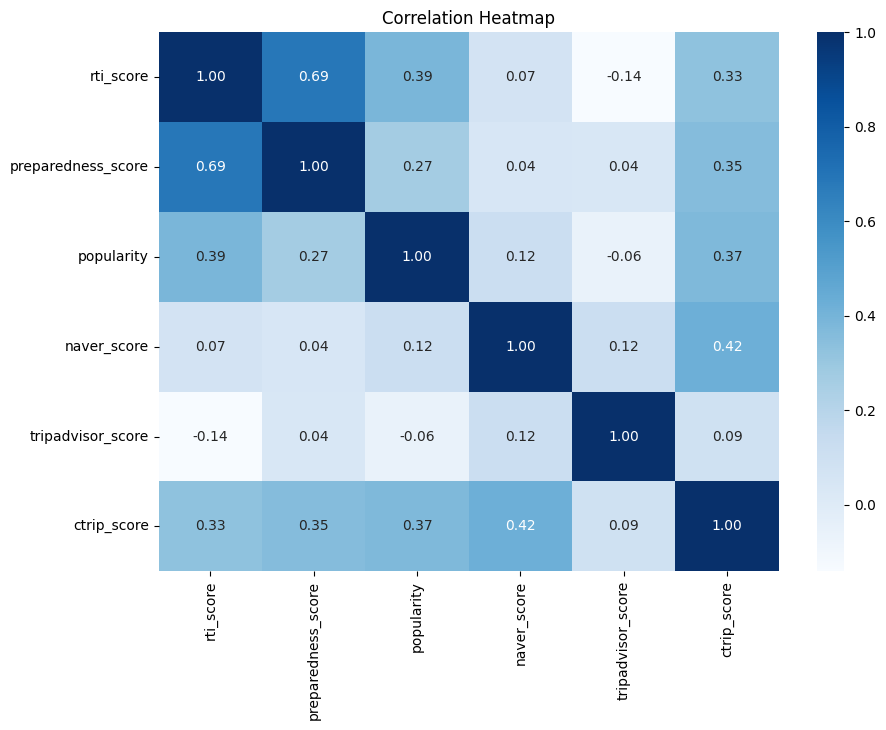

In [38]:
numeric_cols = [
    "rti_score",
    "preparedness_score",
    "popularity",
    "naver_score",
    "tripadvisor_score",
    "ctrip_score"
]

plt.figure(figsize=(10, 7))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()





In [49]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


In [53]:
import numpy as np
import pandas as pd

num_cols = [
    "rti_score",
    "preparedness_score",
    "popularity",
    "naver_score",
    "tripadvisor_score",
    "ctrip_score",
]

def clean_numeric(series: pd.Series) -> pd.Series:

    return (
        series.astype(str)
        .str.replace(",", "", regex=False)
        .str.replace("%", "", regex=False)
        .str.strip()
        .replace({"": np.nan, "nan": np.nan})
        .pipe(pd.to_numeric, errors="coerce")
    )

for col in num_cols:
    if col in df.columns:
        df[col] = clean_numeric(df[col])

print(df[num_cols].dtypes)


rti_score             float64
preparedness_score    float64
popularity            float64
naver_score           float64
tripadvisor_score     float64
ctrip_score           float64
dtype: object


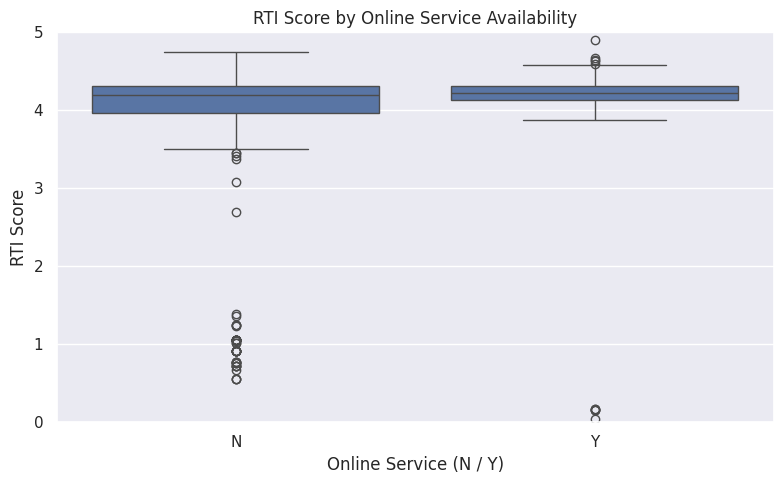

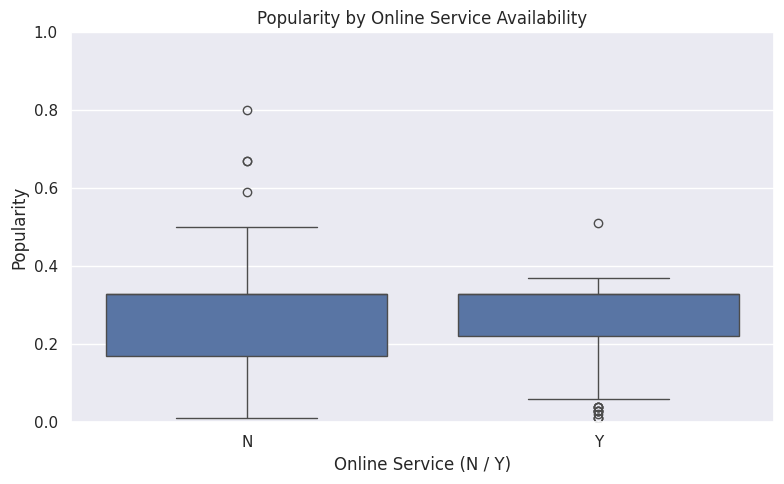

In [59]:
region_stats = (
    df.groupby("region")[["rti_score", "preparedness_score", "popularity"]]
      .agg(["mean", "median", "count"])
      .round(2)
)


plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="online_yn", y="rti_score")
plt.title("RTI Score by Online Service Availability")
plt.xlabel("Online Service (N / Y)")
plt.ylabel("RTI Score")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="online_yn", y="popularity")
plt.title("Popularity by Online Service Availability")
plt.xlabel("Online Service (N / Y)")
plt.ylabel("Popularity")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()




In [60]:

region_stats = (
    df.groupby("region")[["rti_score", "preparedness_score", "popularity"]]
      .agg(["mean", "median", "count"])
      .round(2)
)

print("지역별 품질 지표 요약")
print(region_stats)


✅ 지역별 품질 지표 요약
       rti_score              preparedness_score              popularity  \
            mean median count               mean median count       mean   
region                                                                     
강남구         4.10   4.26   129               0.29   0.30   133       0.28   
강동구         4.05   4.10    19               0.29   0.28    20       0.25   
강북구         4.02   4.01    18               0.28   0.26    18       0.22   
강서구         3.77   4.24    46               0.27   0.29    46       0.32   
관악구         3.96   4.23    39               0.30   0.30    39       0.26   
광진구         3.85   4.14    42               0.28   0.28    43       0.22   
구로구         3.62   4.05    26               0.26   0.26    27       0.20   
금천구         3.74   4.25    14               0.28   0.29    14       0.22   
노원구         4.23   4.23    29               0.30   0.30    29       0.25   
도봉구         3.95   3.96    12               0.30   0.31    12       0.24 

In [85]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get update -qq
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


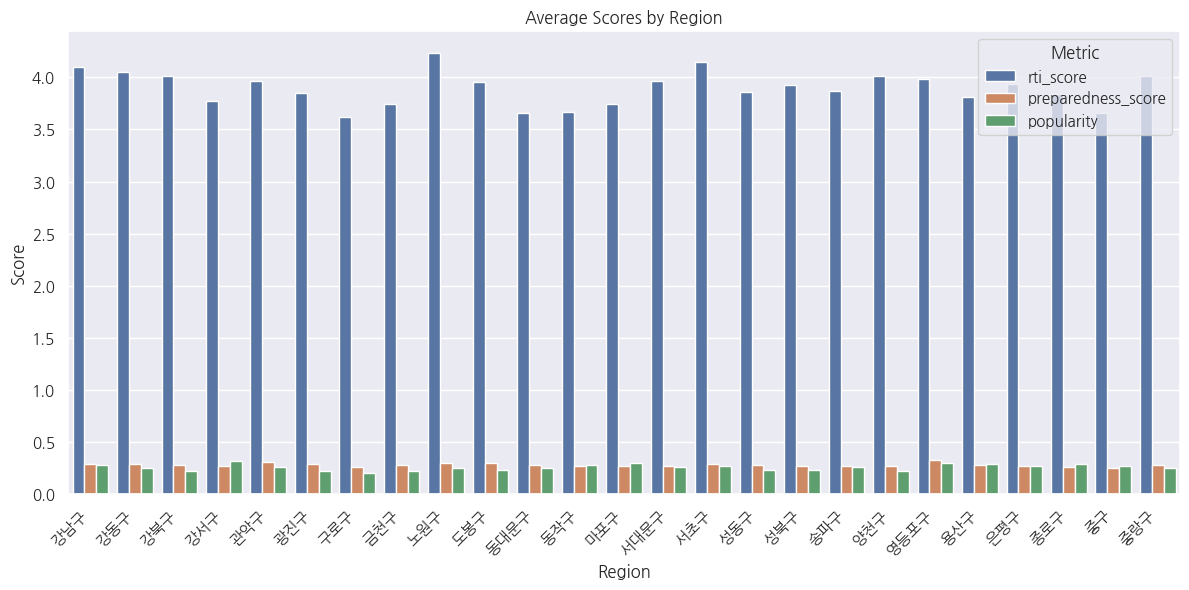

In [63]:
# 1-2. 지역별 평균 점수 막대그래프 (RTI / 수용태세 / 인기도 비교)
region_mean = (
    df.groupby("region")[["rti_score", "preparedness_score", "popularity"]]
      .mean()
      .reset_index()
)

region_long = region_mean.melt(
    id_vars="region",
    value_vars=["rti_score", "preparedness_score", "popularity"],
    var_name="metric",
    value_name="score"
)

plt.figure(figsize=(12, 6))
sns.barplot(data=region_long, x="region", y="score", hue="metric")
plt.title("Average Scores by Region")
plt.xlabel("Region")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


In [67]:
sns.set_theme()

score_cols = ["rti_score", "preparedness_score", "popularity"]
df["quality_mean"] = df[score_cols].mean(axis=1)

q1 = df["quality_mean"].quantile(1/3)
q2 = df["quality_mean"].quantile(2/3)

def label_quality(x):
    if x <= q1:
        return "Low"
    elif x <= q2:
        return "Middle"
    else:
        return "High"

df["quality_group"] = df["quality_mean"].apply(label_quality)

quality_stats = (
    df.groupby("quality_group")[score_cols + ["quality_mean"]]
      .mean()
      .round(2)
      .sort_index()
)

print("품질 그룹별 평균 점수")
print(quality_stats)

✅ 품질 그룹별 평균 점수
               rti_score  preparedness_score  popularity  quality_mean
quality_group                                                         
High                4.34                0.32        0.33          1.68
Low                 3.15                0.22        0.15          1.12
Middle              4.18                0.29        0.27          1.58


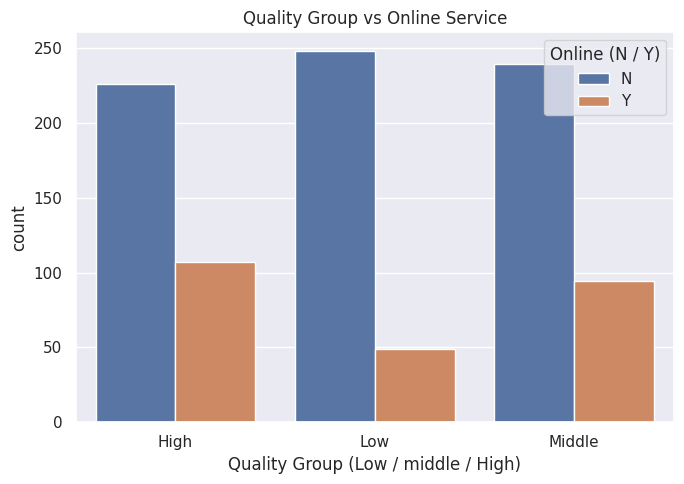

In [68]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="quality_group", hue="online_yn")
plt.title("Quality Group vs Online Service")
plt.xlabel("Quality Group (Low / middle / High)")
plt.ylabel("count")
plt.legend(title="Online (N / Y)")
plt.tight_layout()
plt.show()


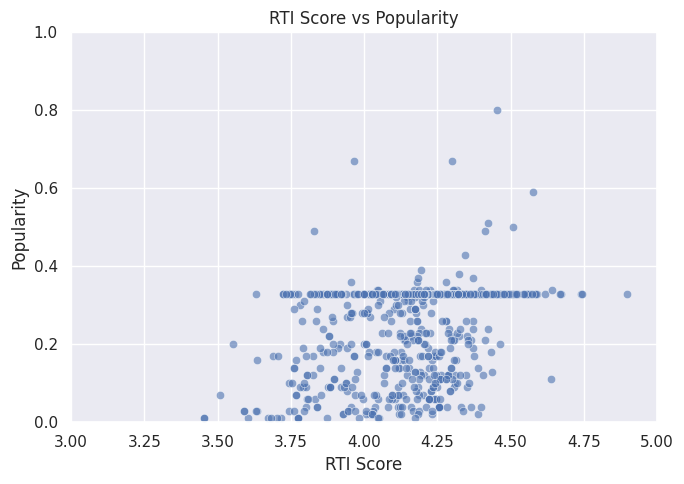

In [75]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="rti_score", y="popularity", alpha=0.6)
plt.title("RTI Score vs Popularity")
plt.xlabel("RTI Score")
plt.ylabel("Popularity")
plt.xlim(3, 5)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


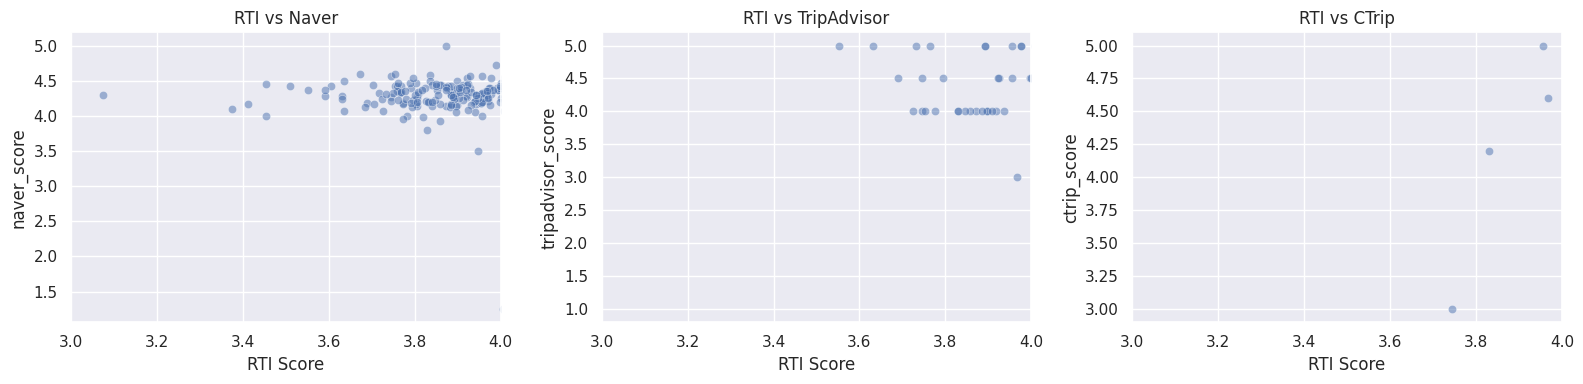

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.scatterplot(data=df, x="rti_score", y="naver_score", alpha=0.5, ax=axes[0])
axes[0].set_title("RTI vs Naver")

sns.scatterplot(data=df, x="rti_score", y="tripadvisor_score", alpha=0.5, ax=axes[1])
axes[1].set_title("RTI vs TripAdvisor")

sns.scatterplot(data=df, x="rti_score", y="ctrip_score", alpha=0.5, ax=axes[2])
axes[2].set_title("RTI vs CTrip")

for ax in axes:
    ax.set_xlabel("RTI Score")
    ax.set_xlim(3, 4)

plt.tight_layout()
plt.show()


In [80]:
# 인기도 상위 10% 기준값
pop_threshold = df["popularity"].quantile(0.90)

print("상위 10% 기준 popularity:", pop_threshold)

top10 = df[df["popularity"] >= pop_threshold].copy()

print("상위 10% 식당 수:", len(top10))
top10.head()


상위 10% 기준 popularity: 0.33
상위 10% 식당 수: 558


,rti_score,naver_score,preparedness_score,식당(ID),name,ctrip_score,어워드정보설명,online_yn,popularity,region,지점명,tripadvisor_score,quality_mean,quality_group
0,4.213839,4.40,0.370,10012,명동정,NaN,모범음식점(2015),N,0.33,중구,None,NaN,1.637946,High
1,4.423649,4.45,0.330,10014,봉추찜닭,4.7,모범음식점(2019),Y,0.51,중구,명동중앙우체국점,NaN,1.754550,High
4,4.400069,4.33,0.307,10018,삼호복집,NaN,모범음식점(2004),Y,0.33,서대문구,None,4.0,1.679023,High
5,4.354342,4.50,0.231,10019,대포찜닭,NaN,안심식당(2021),N,0.33,서대문구,None,NaN,1.638447,High
6,4.403816,4.52,0.331,10020,카페 종로시장,NaN,None,N,0.33,종로구,None,NaN,1.688272,High


In [81]:
cols = ["rti_score", "preparedness_score", "popularity"]

print("전체 평균:")
print(df[cols].mean().round(2))

print("\n상위 10% 평균:")
print(top10[cols].mean().round(2))


전체 평균:
rti_score             3.91
preparedness_score    0.28
popularity            0.26
dtype: float64

상위 10% 평균:
rti_score             4.25
preparedness_score    0.31
popularity            0.33
dtype: float64


In [83]:
region_counts = top10["region"].value_counts()

print("상위 10% 인기 식당 지역 분포:")
print(region_counts)

(region_counts / len(top10) * 100).round(1)



상위 10% 인기 식당 지역 분포:
region
강남구     89
송파구     48
중구      38
강서구     36
종로구     34
용산구     30
서초구     30
서대문구    27
성동구     22
관악구     22
은평구     22
영등포구    21
마포구     19
광진구     18
노원구     15
동작구     14
중랑구     13
구로구     10
강동구      9
양천구      8
동대문구     8
강북구      7
성북구      7
도봉구      6
금천구      5
Name: count, dtype: int64


,count
region,
강남구,15.9
송파구,8.6
중구,6.8
강서구,6.5
종로구,6.1
용산구,5.4
서초구,5.4
서대문구,4.8
성동구,3.9


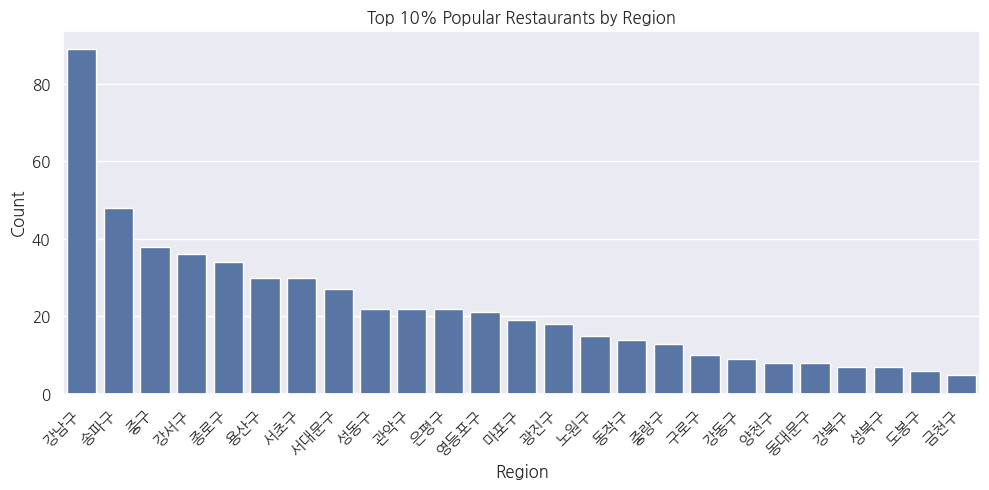

In [86]:
plt.figure(figsize=(10, 5))
sns.countplot(data=top10, x="region", order=top10["region"].value_counts().index)
plt.title("Top 10% Popular Restaurants by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


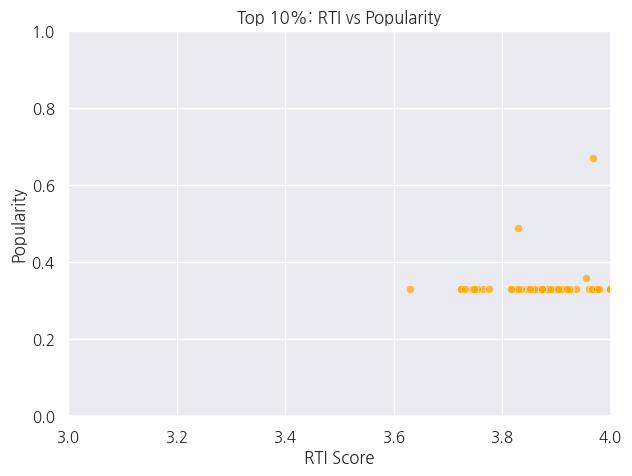

In [90]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=top10, x="rti_score", y="popularity", alpha=0.7, color="orange")
plt.title("Top 10%: RTI vs Popularity")
plt.xlabel("RTI Score")
plt.ylabel("Popularity")
plt.xlim(3, 4)
plt.ylim(0, 1)
plt.show()
